#### 위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성 값을 기반으로 해당 종양이 악성인지 양성인지를 분류한 데이터 세트입니다. 종양의 양성 여부는 class 컬럼에서 확인할 수 있으며, 양성은 2, 악성은 4로 표시되어 있습니다.  

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score

 *breast_cancer* 데이터셋을 데이터프레임으로 불러오기   



In [77]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2


In [78]:
# df 데이터셋의 첫 번째, 두 번째 열을 삭제
df.drop(df.columns[0:2], axis = 1, inplace = True)

아래의 colums_name 변수를 활용하여 0~10까지의 숫자로 되어 있는 컬럼명을 변경하기.

columns_name = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei',
                'chromatin', 'normal_nucleoli', 'mitoses', 'class']


In [79]:
columns_name = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei',
                'chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [80]:
df.columns = columns_name

#### 데이터 전처리

In [81]:
# info를 활용하여 데이터타입을 확인해주세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clump            699 non-null    int64 
 1   cell_size        699 non-null    int64 
 2   cell_shape       699 non-null    int64 
 3   adhesion         699 non-null    int64 
 4   epithlial        699 non-null    int64 
 5   bare_nuclei      699 non-null    object
 6   chromatin        699 non-null    int64 
 7   normal_nucleoli  699 non-null    int64 
 8   mitoses          699 non-null    int64 
 9   class            699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [82]:
# df 데이터 중 bare_nuclei 컬럼의 값 분포를 확인 (value_counts 활용)
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [83]:
# 'bare_nuclei'컬럼에 있는 값 중'?'를 'bare_nuclei' 컬럼의 최빈값으로 대체.
df['bare_nuclei'].replace('?', df['bare_nuclei'].mode()[0], inplace=True)

In [84]:
# 'bare_nuclei'컬럼의 데이터 타입을 숫자형(int)으로 변환.
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

In [85]:
# 양성은 2, 악성은 4로 표시되어 있는 df['class'] 값 중 2(양성)는 숫자 0으로, 4(음성)는 숫자 1로 변환.
df['class'] = df['class'].replace(2, 0)
df['class'] = df['class'].replace(4, 1)

#### 데이터를 Feature와 Label로 분리

In [86]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출해주세요. (레이블 데이터는 class컬럼에 담겨있습니다.)
x = df.drop(['class'], axis = 1)
y = df['class']

StandardScaler를 활용하여 개별 피처의 평균이 0이고, 분산이 1인 값으로 변환.   
columns_name2 = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei',
                'chromatin', 'normal_nucleoli', 'mitoses']


In [87]:
# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(x)
x = scaler.transform(x)

In [88]:
# columns_name2 변수를 생성.
columns_name2 = ['clump', 'cell_size', 'cell_shape',
                 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']

x = pd.DataFrame(x, columns = columns_name2)
x.tail()

,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses
694,-0.503866,-0.699995,-0.743299,-0.633247,-0.097628,-0.410685,-1.000471,-0.611825,-0.343912
695,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,-0.343912
696,0.206936,2.251526,2.287222,0.067687,1.710106,-0.134392,1.872361,2.337594,0.239570
697,-0.148465,1.595632,0.940324,0.418154,-0.097628,0.141902,2.693171,1.026741,-0.343912
698,-0.148465,1.595632,1.613773,0.768621,0.354305,0.418196,2.693171,0.371315,-0.343912


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle = True)

In [90]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(559, 9) (140, 9) (559,) (140,)


#### 결정트리로 학습, 예측 및 평가 수행

In [91]:
dt_clf = DecisionTreeClassifier(random_state=42
                                ,min_samples_split = 5
                                ,max_depth = 6
                                ,min_samples_leaf = 3)
# LogisticRegression 객체를 활용한 학습
dt_clf.fit(x_train, y_train)
# LogisticRegression 객체를 활용한 예측 (LogisticRegression 객체의 predict 메서드 활용)
pred = dt_clf.predict(x_test)

In [92]:
cm = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1= f1_score(y_test, pred)

print('Confusion Matrix:\n ', cm)
print(f"Accuracy: {accuracy:.4f}'\n' Precision: {precision:.4f}'\n' Recall: {recall:.4f}'\n' F1 Score: {f1:.4f}")

Confusion Matrix:
  [[92  3]
 [ 3 42]]
Accuracy: 0.9571'
' Precision: 0.9333'
' Recall: 0.9333'
' F1 Score: 0.9333


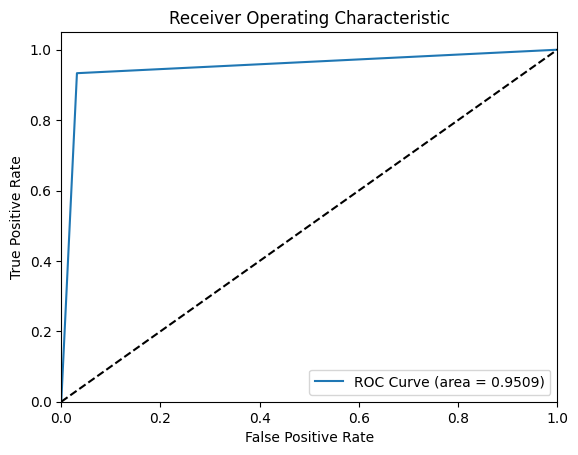


ROC_AUC:  0.9509


In [93]:
# roc_auc_score API를 활용하여 roc auc 값을 출력해주세요.(소수점 넷째 자리에서 반올림하여 출력)
ROC_AUC = roc_auc_score(y_test, pred)

fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.4f)' % ROC_AUC)
plt.plot([0, 1], [0, 1], 'k--') # 대각선 45도 선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print()
print('ROC_AUC: ', np.round(ROC_AUC,4))

-----